<a href="https://colab.research.google.com/github/Rupeshbhardwaj002/Real_time_pothole_detection_using_YOLO/blob/main/Realtime_pothole_detection_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from huggingface_hub import hf_hub_download
path = hf_hub_download(
    repo_id = "rupesh002/pothole_dataset_2",
    repo_type = "dataset",
    filename = "pothole_yolo_dataset.zip"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pothole_yolo_dataset.zip:   0%|          | 0.00/351M [00:00<?, ?B/s]

In [ ]:
!unzip -q {path} -d /content/pothole_dataset

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.6 MB/s eta 0:00:00


In [ ]:
!ls /content/pothole_dataset/pothole_yolo_dataset/train/images | head
!ls /content/pothole_dataset/pothole_yolo_dataset/valid/images | head


potholes0.png
potholes100.png
potholes101.png
potholes102.png
potholes103.png
potholes104.png
potholes105.png
potholes106.png
potholes107.png
potholes108.png
potholes116.png
potholes11.png
potholes120.png
potholes123.png
potholes124.png
potholes126.png
potholes130.png
potholes131.png
potholes139.png
potholes13.png


In [ ]:
!ls -R /content/pothole_dataset/pothole_yolo_dataset/ |head


/content/pothole_dataset/pothole_yolo_dataset/:
data.yaml
train
valid

/content/pothole_dataset/pothole_yolo_dataset/train:
images
labels

/content/pothole_dataset/pothole_yolo_dataset/train/images:


In [ ]:
!ls -R /content/pothole_dataset/pothole_yolo_dataset/data.yaml |head


/content/pothole_dataset/pothole_yolo_dataset/data.yaml


In [ ]:
!yolo detect train \
  data="/content/pothole_dataset/pothole_yolo_dataset/data.yaml" \
  model=yolov8m.pt \
  epochs=120 \
  imgsz=1280 \
  batch=8 \
  hsv_h=0.02 hsv_s=0.7 hsv_v=0.4 \
  degrees=10 translate=0.1 scale=0.8 fliplr=0.5 mosaic=1.0 \
  patience=50 \
  name=pothole_strong

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pothole_dataset/pothole_yolo_dataset/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_strong2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, 

In [ ]:
from google.colab import files
files.download('/content/runs/detect/pothole_strong2/weights/best.pt')
files.download('/content/runs/detect/pothole_strong2/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/runs/detect/pothole_strong2/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo detect train \
  data="/content/pothole_dataset/pothole_yolo_dataset/data.yaml" \
  model="/content/runs/detect/pothole_strong2/weights/best.pt" \
  epochs=50 \
   batch=4 \
  imgsz=1280 \
  lr0=0.005 \
  name=pothole_finetuned


Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pothole_dataset/pothole_yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/pothole_strong2/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_finetuned, nbs=64, nms=False, opset=None, optimize=False, op

In [ ]:
files.download('/content/runs/detect/pothole_finetuned/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/runs/detect/pothole_finetuned/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo detect predict \
  model="/content/runs/detect/pothole_finetuned/weights/best.pt" \
  source="//content/Dashcam_pothole3.mp4" \
  conf=0.35 \
  iou=0.6 \
  save=True


IndentationError: unexpected indent (ipython-input-3612024288.py, line 2)

In [ ]:
!yolo detect predict \
  model="/content/runs/detect/pothole_finetuned/weights/best.pt" \
  source="//content/Dashcam_pothole2.mp4" \
  conf=0.35 \
  iou=0.6 \
  save=True

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 60.6ms
video 1/1 (frame 2/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 58.2ms
video 1/1 (frame 3/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 58.1ms
video 1/1 (frame 4/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 44.6ms
video 1/1 (frame 5/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 43.4ms
video 1/1 (frame 6/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 40.1ms
video 1/1 (frame 7/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 39.3ms
video 1/1 (frame 8/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 39.4ms
video 1/1 (frame 9/832) //content/Dashcam_pothole2.mp4: 736x1280 (no detections), 37.8ms
video 1/1 (frame 10/832) //conten

In [ ]:
files.download('/content/runs/detect/predict2/Dashcam_pothole2.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

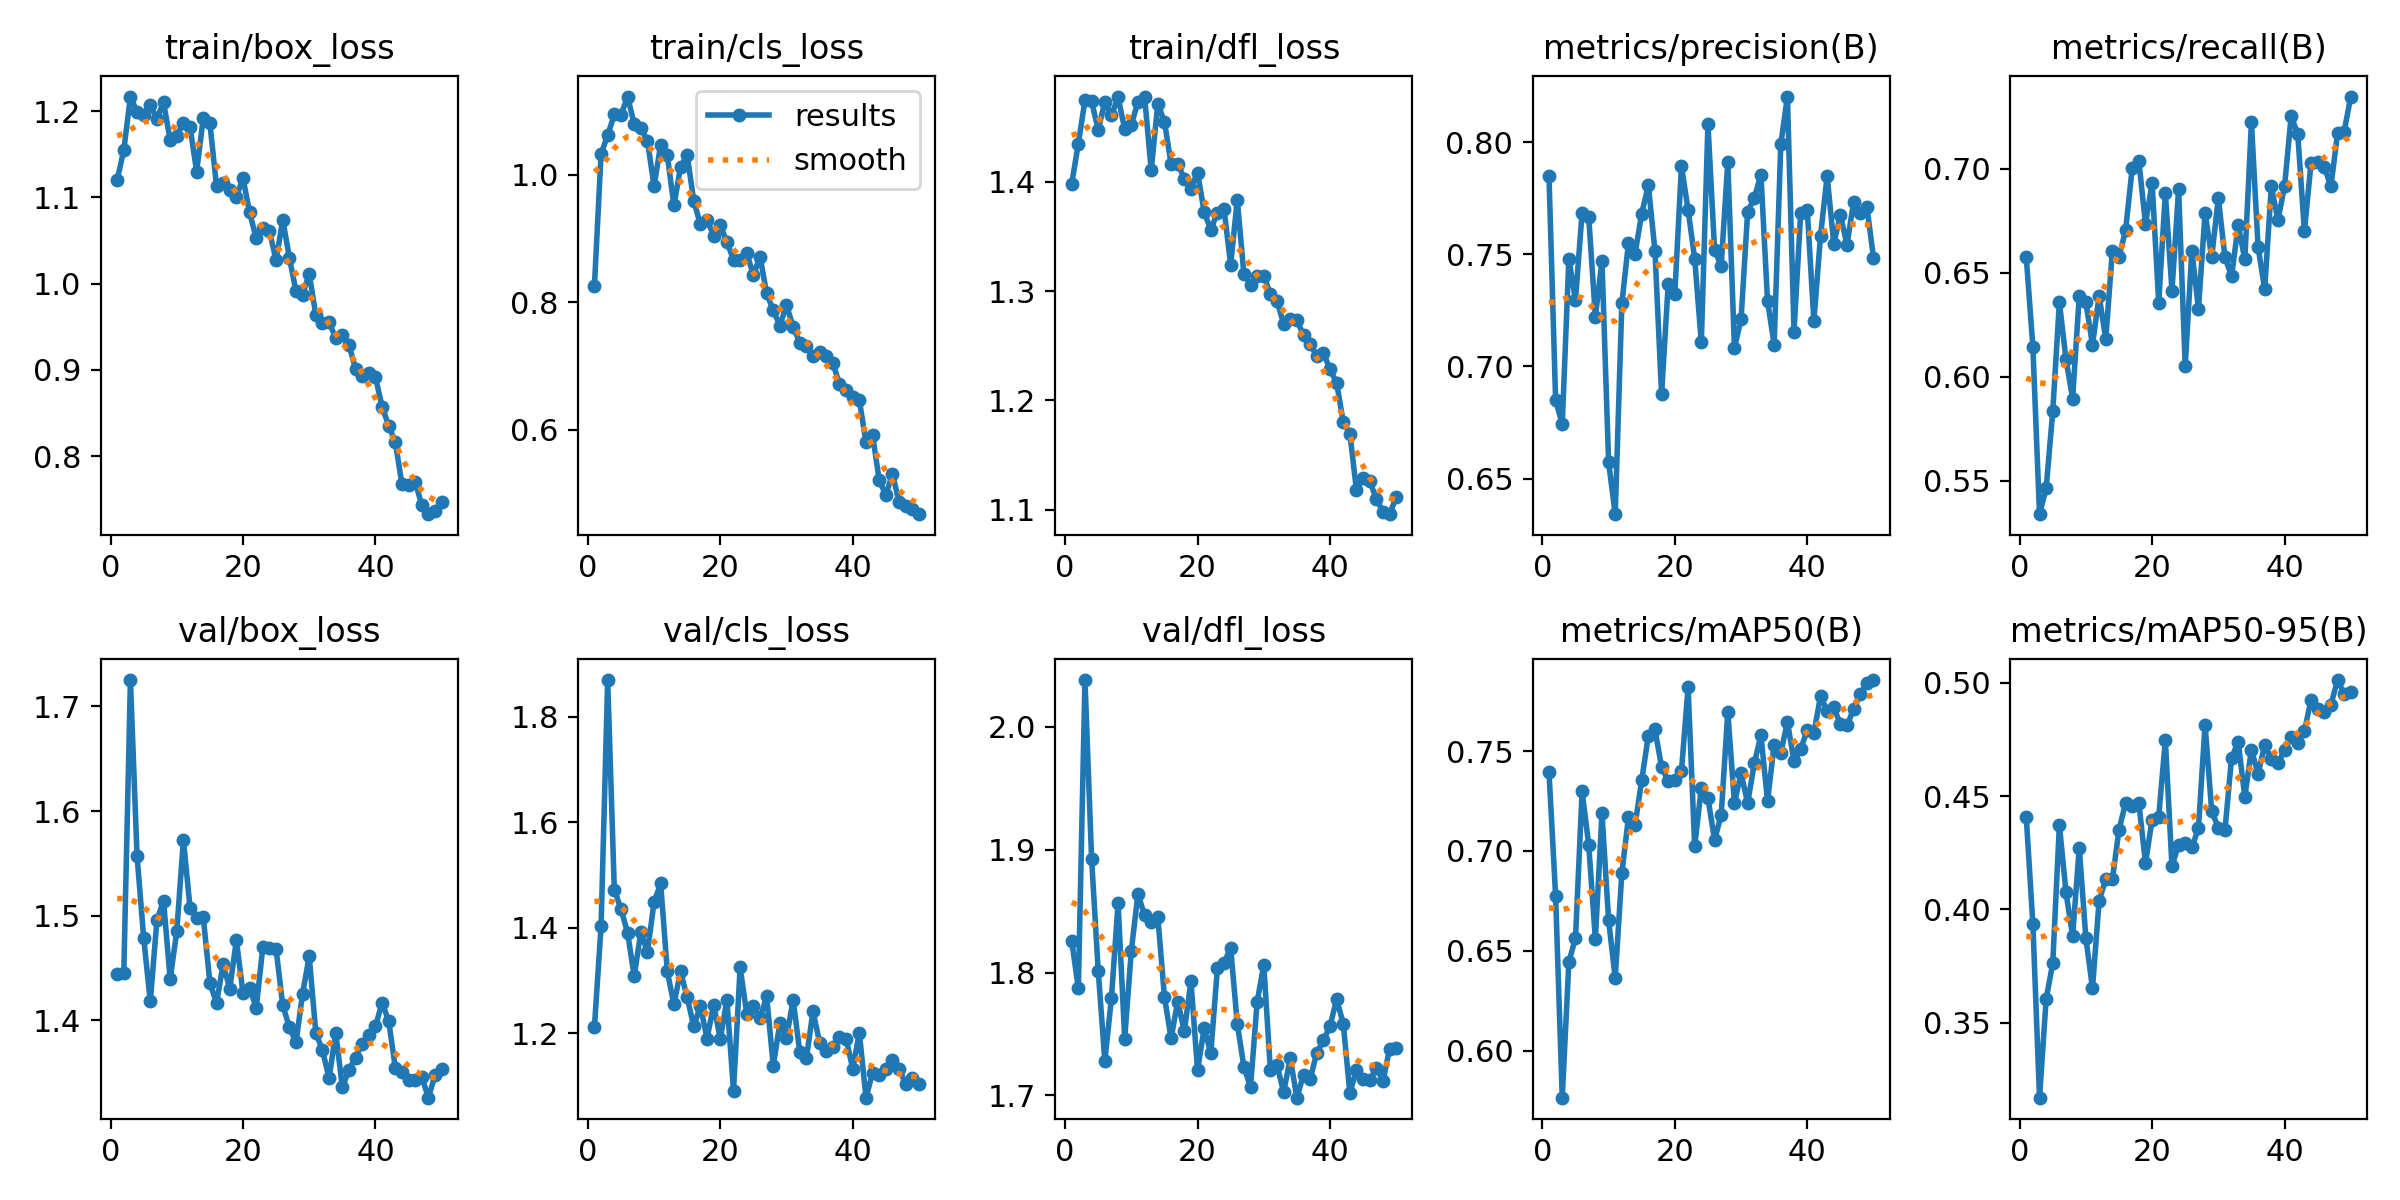

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/pothole_finetuned/results.png', width=2000)

In [ ]:
!yolo detect predict \
  model="/content/runs/detect/pothole_finetuned/weights/best.pt" \
  source="/content/Dashcam_Pothole1.mp4" \
  conf=0.35 \
  iou=0.6 \
  save=True

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 76.7ms
video 1/1 (frame 2/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 72.4ms
video 1/1 (frame 3/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 72.4ms
video 1/1 (frame 4/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 45.7ms
video 1/1 (frame 5/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 44.8ms
video 1/1 (frame 6/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 42.1ms
video 1/1 (frame 7/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 41.6ms
video 1/1 (frame 8/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 41.4ms
video 1/1 (frame 9/814) /content/Dashcam_Pothole1.mp4: 736x1280 (no detections), 36.5ms
video 1/1 (frame 10/814) /content/Dashcam_

In [ ]:
files.download('/content/runs/detect/predict3/Dashcam_Pothole1.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

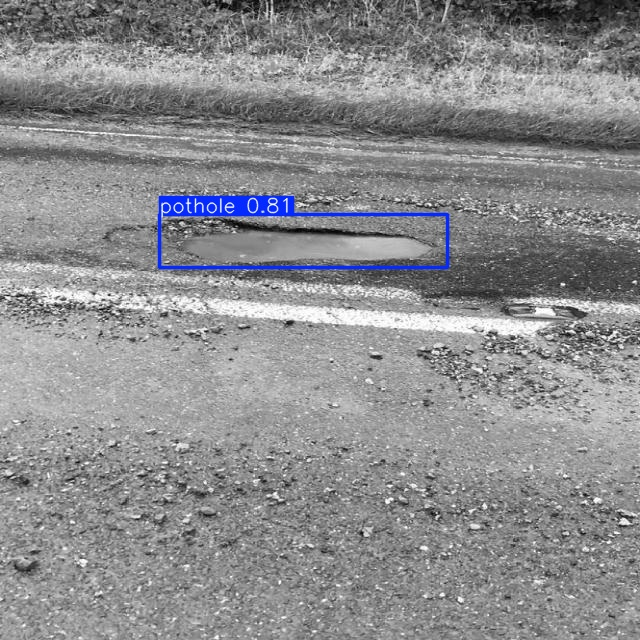

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/predict/Pothole-002_jpg.rf.211f94f7dd339a1266bc76cc8445fd3b.jpg', width=600)


In [ ]:
from google.colab import files
files.download('/content/runs/detect/pothole_finetuned/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>